# scikit-learn

## What is it?

> scikit-learn (abbreviated `sklearn`) is a __high-level machine learning library__ containing:
> - machine learning algorithms
> - example datasets
> - data pre-processing & pipelines

Pair that with simple API and we get a powerful & easy tool to get the job done

In [1]:
import sklearn

print(sklearn.__version__)

0.23.2


Although it didn't reach stable version (yet), it was around for __more than 10 years__ and is used throughout the industry.

## Where it is used

- Fast prototyping and testing ideas
- __Part__ of more complicated pipelines
- Often as part of Machine Learning research (if possible)

`sklearn` is rarely used in production environments on it's own as more optimized options are often developed in-house (say tailored to specific algorithm) __or__ there are ready alternatives.

## Simple example

We will introduce `sklearn` as a simple tool which allows us to easily show you concepts without delving into details.

__Do not sweat over what are those algorithms right now, we will go over them in the next chapters in detail!__

## Data Loading

As mentioned, `sklearn` provides a few ready datasets for us to use. Data is returned either in `np.array`s or in `pd.DataFrame` which you should be familiar with by now (we will stick to `np.array` though as it's more common).

## Exercise

Load [Boston Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) as `np.array` (check arguments!)

Print shape of both features and targets

In [4]:
from sklearn import datasets
import pandas
# np.array instances
x,y=datasets.load_boston(return_X_y=True)
print(x.shape)
print(y.shape)

df=pandas.DataFrame(y)
df.head()

(506, 13)
(506,)


,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


This is `Boston` house pricing dataset with `503` examples, `13` features and respective `y` targets.

## Features

Features consist of `13` features, among which we can find:
- crime rate in this part of town
- whether there is a Charles River nearby
- how many teachers for a single pupil are in this area

> As you can see features may be really creative, some may not be related to our task, while others might be in unintuitive way.

__We should always perform data analysis when we want to solve the task!__

## Targets

`y` (targets) is simply house price connected to those features that we would like to predict at the end of this notebook

_You can read more about Boston Dataset [here](https://www.kaggle.com/c/boston-housing)_

In [36]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

As the targets are floating points, we can use them in a __regression task__ we should solve.

In [37]:
x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

Features are also floating point arrays. We will use them to train our algorithm.

## Model

Now that we have example dataset, we can create model which will learn to predict based on it.

In `sklearn` it is really simple (see [documentation](https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors)).

Here we will use basic ML algorithm __Linear Regression__ you will find more about later. 

> When we have some features and want to predict a continous variable (regression), linear regression is one algorithm we can use to do so

## Exercise

Load [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and set `normalize` to `True`.

Also import appropriate package from `sklearn` to do that:

In [38]:
from sklearn import linear_model

model = linear_model.LinearRegression(normalize=True)

## API of models

`sklearn` machine learning algorithms are objects which usually follow this general convention:

- `__init__(*args, **kwargs)` - here you setup your algorithm (as seen above). It controls parts of it behaviours, usually those are hyperparameters (you will learn about them in following lessons)
- `fit(X, [y])` - train algorithm on `X` (features) and `y` (targets). In case of unsupervised algorithms there is no `y`, we will also see it later
- `predict(X)` - pass data (previously unseen) to algorithm after `fit` was called. This gives us predictions (`y_pred`). In our case how much will a house cost.

Given that we can do the following:

In [39]:
model.fit(x, y)
y_pred = model.predict(x)

print(y_pred[:5], "\n", y[:5])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423] 
 [24.  21.6 34.7 33.4 36.2]


## Evaluating our model

So our model predicts some values, but how well does it actually do? `sklearn` provides performance __metrics__ for us to use.

You can see `sklearn`'s metrics [here](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics), in this case we will use [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

We will go over it in detail later, but for now it is enough for you to understand the smaller the error the better.

## Exercise

Import `seklarn.metrics.mean_squared_error` using `from` import syntax and
display what is the error between true targets and predicted ones

In [40]:
from sklearn import metrics

metrics.mean_squared_error(y, y_pred)

21.894831181729202

## Model persistance

Training (`fitting`) process is often quite expensive, while what we are after is the ability to predict on unseen data (we will see what "unseen data" exactly is in the next notebook).

We see our model works okay and we would like to save it for later use without the need to `train` on the data.

> Model persistence means saving your machine learning algorithm currently held in RAM (Random Access Memory) to a storage (usually hard drive) from which it can be reinstantiated at any point in time

As per usual it's simple with `sklearn`:

In [41]:
import joblib

joblib.dump(model, "model.joblib")





['model.joblib']

## Congratulations, BUT

You made your first machine learning model in roughly `5` lines of code.
Why would we need anything else?

### Downsides

As `sklearn` is very high level it doesn't require much knowledge to use as is.
But __we have to know more__ in order to do machine learning well. What is missing here:

- Why and what for? There are many more ways (and way more correct) to do machine learning
- Knowledge of machine learning algorithms; we have to know which one to choose for which kind of problems
- Knowledge of possible pitfalls; machine learning can easily go wrong. We have to know more about it in order to improve our model's performance
- In-depth knowledge of the ideas; often it might be a good idea to implement major ideas on your own

__We will do all of the above__, but hopefully you can see how easy and definitely not scary it can be.

## Pipelines

`scikit-learn` offers other goodies you can use. `Pipelines` are a way to easy join multiple machine learning related steps into one.

Also everything we have seen in previous steps is employed here. `pipe` also has similar API.

## Exercise

Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and LinearRegression inside a [`sklearn.pipeline.Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline).

- PCA comes first (method for dimensionality reduction), and should have `5` components
- Followed by LinearRegression (can have default arguments)
- Fit this pipeline to data, `predict` on `X`
- Display Mean Squared Error once more

You can also use [`sklearn.pipeline.make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline)

In [42]:
# Now you go fully on your own 
from sklearn import decomposition
from sklearn.pipeline import Pipeline

MSE_Dict={}

for i in range(1,x.shape[1]+1):
    pca = decomposition.PCA(n_components=i)
    linear = linear_model.LinearRegression()
    pipe = Pipeline(steps=[('pca', pca), ('linear', linear)])
    pipe.fit(x, y)
    y_pred = pipe.predict(x)
    print(f"Mean Squared Error: {metrics.mean_squared_error(y, y_pred)}")
    MSE_Dict[i]=metrics.mean_squared_error(y, y_pred)
MSE_Dict

Mean Squared Error: 64.3996585529436
Mean Squared Error: 63.921010519406856
Mean Squared Error: 60.13174820912706
Mean Squared Error: 59.66068324849682
Mean Squared Error: 56.802694641255044
Mean Squared Error: 35.64713141766197
Mean Squared Error: 34.802415241050454
Mean Squared Error: 33.66792053933331
Mean Squared Error: 28.685490783281985
Mean Squared Error: 27.01024104936507
Mean Squared Error: 23.218866035717184
Mean Squared Error: 22.858158793342067
Mean Squared Error: 21.894831181729206


{1: 64.3996585529436,
 2: 63.921010519406856,
 3: 60.13174820912706,
 4: 59.66068324849682,
 5: 56.802694641255044,
 6: 35.64713141766197,
 7: 34.802415241050454,
 8: 33.66792053933331,
 9: 28.685490783281985,
 10: 27.01024104936507,
 11: 23.218866035717184,
 12: 22.858158793342067,
 13: 21.894831181729206}

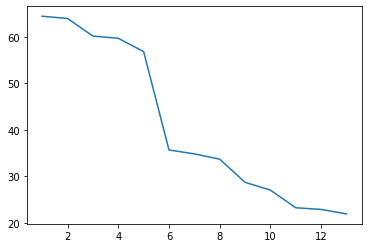

In [43]:
import matplotlib.pyplot as plt 
ax=plt.figure()
plt.plot(list(MSE_Dict.keys()),list(MSE_Dict.values()))

In [4]:
import sklearn as sk
#from sklearn.module import Object, function
#from sklearn import module



## sklearn tips

- __Always try easiest solution first__. Create a weak baseline algorithm and check how it performs. Do not go straight to the most complicated ones! It is called [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor) in philosophy and machine learning also
- Some algorithms have attributes you might be interested in. Those are usually suffixed by `_` underscore, for example `my_algorithm.interesting_attribute_`
- Some `__init__` functions have __a lot of possible arguments__. Each of them influences how the algorithm works. But which are the most important and have the most influence? __In `sklearn` those arguments come in order from most influential to least__
- Many `sklearn` algorithms provide `n_jobs` argument, which parallelizes `fit`, `predict` and other functions. You can use `n_jobs=-1` to use as many processes as there are virtual cores (it is often a reasonable amount), which improves performance tremendously.
- __Use idiomatic `sklearn`__ - search the documentation, use pipelines if possible

## Challenges

- Fit `sklearn.Pipeline` consisting of [`VarianceThreshold`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) and [`T-SNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) as the first and second algorithm instead of PCA, followed by [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Do it on [`diabetes`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) and [`boston`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) datasets.
- Go around `scikit-learn` documentation and learn more about it. Write your own more in-depth notes

## Summary

- `sklearn` is a high level library used to quickly prototype solutions
- It is not optimized for all tasks it does, many can be done in a more efficient manner
- `API` is consistent throughout the library and each object has similiar methods like:
    - `__init__` (to setup algorithm)
    - `fit`
    - `predict`
- `sklearn.pipeline.Pipeline` is powerful tool for chaining multiple operations in a readable manner